# Data cleaning and Exploration

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
# Loading the data
df = pd.read_excel('../data/default_of_credit_card_clients__courseware_version_1_21_19.xls')
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


### Data Dictionary
__LIMIT_BAL__: Amount of the credit provided (in New Taiwanese (NT) dollar) including individual consumer credit and the family (supplementary) credit.

__SEX__: Gender (1 = male; 2 = female).

__EDUCATION__: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

__MARRIAGE__: Marital status (1 = married; 2 = single; 3 = others).

__AGE__: Age (year).

__PAY_1–PAY_6__: A record of past payments. Past monthly payments, recorded from April to September, are stored in these columns.

__PAY_1__ represents the repayment status in September; __PAY_2__ = repayment status in August; and so on up to __PAY_6__, which represents the repayment status in April.

The measurement scale for the repayment status is as follows: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; and so on up to 8 = payment delay for eight months; 9 = payment delay for nine months and above.

__BILL_AMT1–BILL_AMT6__: Bill statement amount (in NT dollar).

__BILL_AMT1__ represents the bill statement amount in September; __BILL_AMT2__ represents the bill statement amount in August; and so on up to __BILL_AMT7__, which represents the bill statement amount in April.

__PAY_AMT1–PAY_AMT6__: Amount of previous payment (NT dollar). __PAY_AMT1__ represents the amount paid in September; __PAY_AMT2__ represents the amount paid in August; and so on up to __PAY_AMT6__, which represents the amount paid in April.



In [4]:
# Basic informations of the DataFrame
df.shape

(30000, 25)

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

### First impressions
The dataset has 25 columns, 1 is for the IDs, 1 is for the response, and 23 are the data features.
There are 30000 rows (samples). I'll test to see if there are in fact that many valid rows.


In [7]:
df['ID'].nunique()

29687

In [8]:
id_counts = df['ID'].value_counts()
id_counts.head()

4e2380e6-a8cf    2
cdae2be5-8ec4    2
2a8713e6-0f03    2
b6ca3733-7459    2
249b09c0-f4c7    2
Name: ID, dtype: int64

In [9]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

### Duplicate IDs
I could check that there are some repeated ids, but they are never more then two. Let's see how those duplicates behave on the dataset. 

In [10]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

4e2380e6-a8cf    True
cdae2be5-8ec4    True
2a8713e6-0f03    True
b6ca3733-7459    True
249b09c0-f4c7    True
Name: ID, dtype: bool

In [11]:
dupe_ids = id_counts.index[dupe_mask]
len(dupe_ids)

313

In [12]:
df.loc[df['ID'].isin(dupe_ids[:3]), :].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5650,cdae2be5-8ec4,30000,2,2,2,38,1,-2,-2,-1,...,239,89,589,0,0,239,0,500,0,0
5750,cdae2be5-8ec4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22923,2a8713e6-0f03,500000,2,1,1,36,0,0,0,-1,...,15406,6196,45045,26000,11725,15406,6903,45045,10000,0
23023,2a8713e6-0f03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27339,4e2380e6-a8cf,170000,1,2,1,37,Not available,2,0,0,...,82034,85664,89272,0,5000,5000,5000,5000,5000,0
27439,4e2380e6-a8cf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Null Rows
The duplicate ids appear to appear to be related with rows filled with zeros. Let's remove those rows and see if we can fix the problem.

In [13]:
df_zero_mask = df == 0 

In [14]:
features_zero_mask = df_zero_mask.iloc[:,1:].all(axis = 1)
sum(features_zero_mask)

315

In [15]:
df_clean_1 = df.loc[~features_zero_mask, :].copy()

In [16]:
df_clean_1.shape

(29685, 25)

In [17]:
df_clean_1['ID'].nunique()

29685

### Removing Null Rows
After search for the total of the null rows on our dataset, we found ou that there is actualy more null rows then duplicated rows. After we remove those rows, we can see that there is no more duplicated rows. Let's continue to explore the dataset.

In [18]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [19]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [20]:
valid_pay_1_mask = df_clean_1['PAY_1'] == 'Not available'

In [21]:
sum(valid_pay_1_mask)

3021

In [22]:
df_clean_2 = df_clean_1.loc[~valid_pay_1_mask, :].copy()

In [23]:
df_clean_2.shape

(26664, 25)

In [24]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


### Data inconsistency
Looking our data types, we can see that the column PAY_1 is the only "object" on our features. When we inspect it, we can see it some inconsistencies. The first is the attribute 'Not available' and second the numbers that are'nt in our dictionary, like 0 and -2. For this part, we will assume that the new number are just new categories that our client forgot to tell us, but the 'Not available' will be removed. Now let's explore the remainig features.

### Exploring Numerical Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f8a87a4d0>,
      dtype=object)

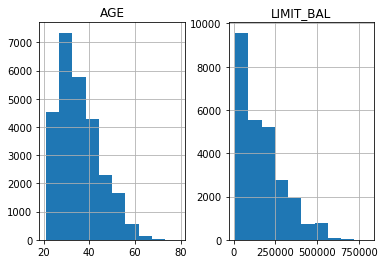

In [25]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [26]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


The data shows reasonably distributed, with no visible inconsistency

### Exploring Categorical Data

#### Education

In [27]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [28]:
df_clean_2['EDUCATION'].replace([0,5,6], value = 4, inplace= True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

Analyzing de feature, we could see that there were values out of the original scope. As we had the category 'others', we then put all this values on it.

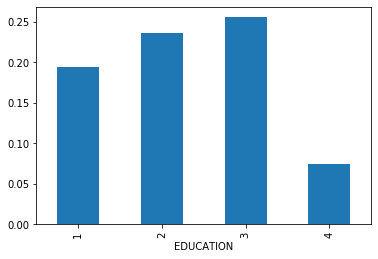

In [36]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)

#### Marriage

In [29]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [30]:
df_clean_2['MARRIAGE'].replace(to_replace = 0, value = 3, inplace = True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

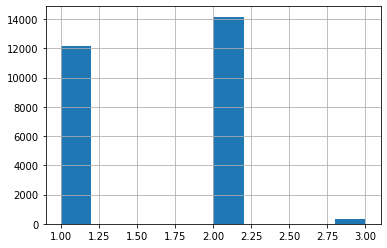